In [32]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [33]:
data = {'a':(0,.3), 'b': (0.2,.3), 'c': (.1,.3), 'd': (0.3,0.4),'e':(.1,.2),'f':(.1,.4)}

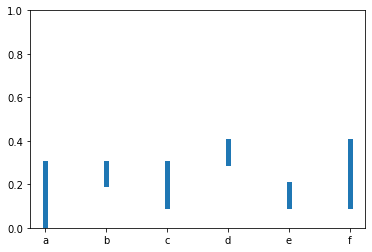

In [34]:
for key, values in data.items():
    ymin, ymax = values
    plt.axvline(x=key, ymin=ymin, ymax=ymax, lw=5)

In [35]:
years = {'a':(2010,2012), 'b': (2008,2014), 'c': (2011,2012), 'd': (2009,2016),'e':(2012,2014),'f':(2009,2012)}
width=0.5

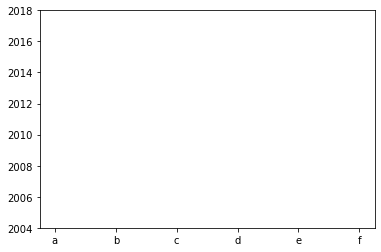

In [36]:
plt.ylim(2004,2018)
for key, values in years.items():
    ymin, ymax = values
    plt.axvline(x=key, ymin=ymin, ymax=ymax, lw=1000)

In [37]:
years

{'a': (2010, 2012),
 'b': (2008, 2014),
 'c': (2011, 2012),
 'd': (2009, 2016),
 'e': (2012, 2014),
 'f': (2009, 2012)}

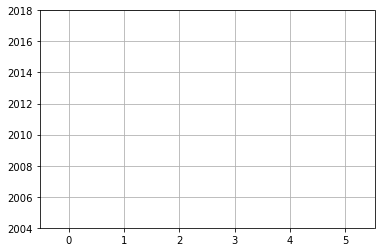

In [38]:
fig, ax = plt.subplots()
plt.ylim(2004,2018)
for i, values in enumerate(years.values()):
    ymin, ymax = values
    ax.axvspan(xmin=i-width/2, xmax=i+width/2, ymin=ymin,ymax=ymax)

ax.grid(True)

In [46]:
# example data recorded by two different sensors
example_data1 = np.random.rand(5,2)
example_data2 = np.random.rand(9,2)
example_data3 = np.random.rand(9,2)

# timestamps from sensor1
times1 = ['2000-01-01 09:00:00',
        '2000-01-01 09:15:00',
        '2000-01-01 09:30:00',
        '2000-01-01 09:45:00',
        '2000-01-01 10:00:00']

# timestamps from sensor2
times2 = ['2000-01-01 08:45:00',
        '2000-01-01 09:00:00',
        '2000-01-01 09:15:00',
        '2000-01-01 09:30:00',
        '2000-01-01 09:45:00',
        '2000-01-01 10:00:00',
        '2000-01-01 10:15:00',
        '2000-01-01 10:30:00',
        '2000-01-01 10:45:00']

# timestamps from sensor2
times3 = ['2000-01-01 09:20:00',
        '2000-01-01 09:40:00',
        '2000-01-01 10:00:00',
        '2000-01-01 10:20:00',
        '2000-01-01 10:40:00',
        '2000-01-01 11:00:00',
        '2000-01-01 11:20:00',
        '2000-01-01 11:40:00',
        '2000-01-01 12:00:00']


# create the DataFrame object for sensor1 with the times and data above
sensor1 = pd.DataFrame({'Time': times1,
                    'measure1': example_data1[:,0],
                    'measure2': example_data1[:,1]})

# create the DataFrame object for sensor2 with the times and data above
sensor2 = pd.DataFrame({'Time': times2,
                    'measure1': example_data2[:,0],
                    'measure2': example_data2[:,1]})

# create the DataFrame object for sensor2 with the times and data above
sensor3 = pd.DataFrame({'Time': times3,
                    'measure1': example_data3[:,0],
                    'measure2': example_data3[:,1]})

In [47]:
sensor1

,Time,measure1,measure2
0,2000-01-01 09:00:00,0.276707,0.390673
1,2000-01-01 09:15:00,0.211947,0.915511
2,2000-01-01 09:30:00,0.273915,0.879367
3,2000-01-01 09:45:00,0.419352,0.240731
4,2000-01-01 10:00:00,0.369062,0.093554


In [50]:
idx1 = pd.Index(sensor1.Time)
idx2 = pd.Index(sensor2.Time)
idx3 = pd.Index(sensor3.Time)

In [51]:
idx1

Index(['2000-01-01 09:00:00', '2000-01-01 09:15:00', '2000-01-01 09:30:00',
       '2000-01-01 09:45:00', '2000-01-01 10:00:00'],
      dtype='object', name='Time')

In [52]:
df = pd.DataFrame(index=idx1.union(idx2).union(idx3))

In [53]:
df

""
Time
2000-01-01 08:45:00
2000-01-01 09:00:00
2000-01-01 09:15:00
2000-01-01 09:20:00
2000-01-01 09:30:00
2000-01-01 09:40:00
2000-01-01 09:45:00
2000-01-01 10:00:00
2000-01-01 10:15:00


In [57]:
df['Sensor1'] = df.index.to_series().apply(lambda x: 3 if x >= sensor1.Time.min() and x <= sensor1.Time.max() else np.NaN)
df['Sensor2'] = df.index.to_series().apply(lambda x: 2 if x >= sensor2.Time.min() and x <= sensor2.Time.max() else np.NaN)
df['Sensor3'] = df.index.to_series().apply(lambda x: 1 if x >= sensor3.Time.min() and x <= sensor3.Time.max() else np.NaN)

In [58]:
df

,Sensor1,Sensor2,Sensor3
Time,,,
2000-01-01 08:45:00,NaN,2.0,NaN
2000-01-01 09:00:00,3.0,2.0,NaN
2000-01-01 09:15:00,3.0,2.0,NaN
2000-01-01 09:20:00,3.0,2.0,1.0
2000-01-01 09:30:00,3.0,2.0,1.0
2000-01-01 09:40:00,3.0,2.0,1.0
2000-01-01 09:45:00,3.0,2.0,1.0
2000-01-01 10:00:00,3.0,2.0,1.0
2000-01-01 10:15:00,NaN,2.0,1.0


[Text(0, 0, 'Sensor3'), Text(0, 0, 'Sensor2'), Text(0, 0, 'Sensor1')]

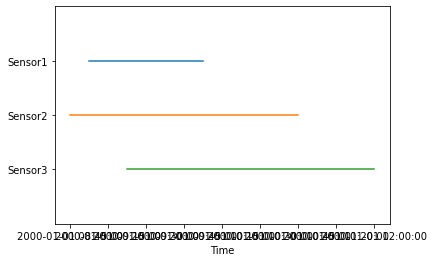

In [66]:
# plot
p = df.plot(ylim=[0, 4], legend=False)
p.set_yticks([1., 2., 3.])
p.set_yticklabels(['Sensor3', 'Sensor2', 'Sensor1'])

In [82]:
# years from podcast1
# years1 = ['2010-01-01 09:00:00',
#         '2012-03-02 09:00:00']
years1 = [2010,2012]

# years from podcast2
# years2 = ['2008-02-19 09:00:00',
#         '2014-06-03 09:00:00']
years2 = [2008,2014]

# years from podcast3
# years3 = ['2011-03-11 09:00:00',
#         '2012-09-02 09:00:00']
years3 = [2011,2012]

In [83]:
podcast1 = pd.DataFrame({'Time': years1})
podcast2 = pd.DataFrame({'Time': years2})
podcast3 = pd.DataFrame({'Time': years3})
podx1 = pd.Index(podcast1.Time)
podx2 = pd.Index(podcast2.Time)
podx3 = pd.Index(podcast3.Time)

In [84]:
podcast2

,Time
0,2008
1,2014


In [85]:
podcasts = pd.DataFrame(index=podx1.union(podx2).union(podx3))
podcasts

""
Time
2008
2010
2011
2012
2014


In [86]:
podcasts['Podcast1'] = podcasts.index.to_series().apply(lambda x: 3 if x >= podcast1.Time.min() and x <= podcast1.Time.max() else np.NaN)
podcasts['Podcast2'] = podcasts.index.to_series().apply(lambda x: 2 if x >= podcast2.Time.min() and x <= podcast2.Time.max() else np.NaN)
podcasts['Podcast3'] = podcasts.index.to_series().apply(lambda x: 1 if x >= podcast3.Time.min() and x <= podcast3.Time.max() else np.NaN)

In [87]:
podcasts

,Podcast1,Podcast2,Podcast3
Time,,,
2008,NaN,2,NaN
2010,3.0,2,NaN
2011,3.0,2,1.0
2012,3.0,2,1.0
2014,NaN,2,NaN


[Text(0, 0, 'Podcast 1'), Text(0, 0, 'Podcast 2'), Text(0, 0, 'Podcast 3')]

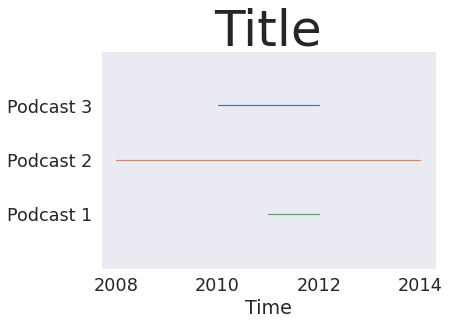

In [159]:
import seaborn as sns
sns.set(style="dark", rc={"lines.linewidth": 8.0})
# sns.set_context("paper", font_scale=2.0)  
sns.set_context("talk", rc={"font.size":30,"axes.titlesize":8,"axes.labelsize":30,"lines.linewidth": 8.0})

Text(0.5, 0, '')

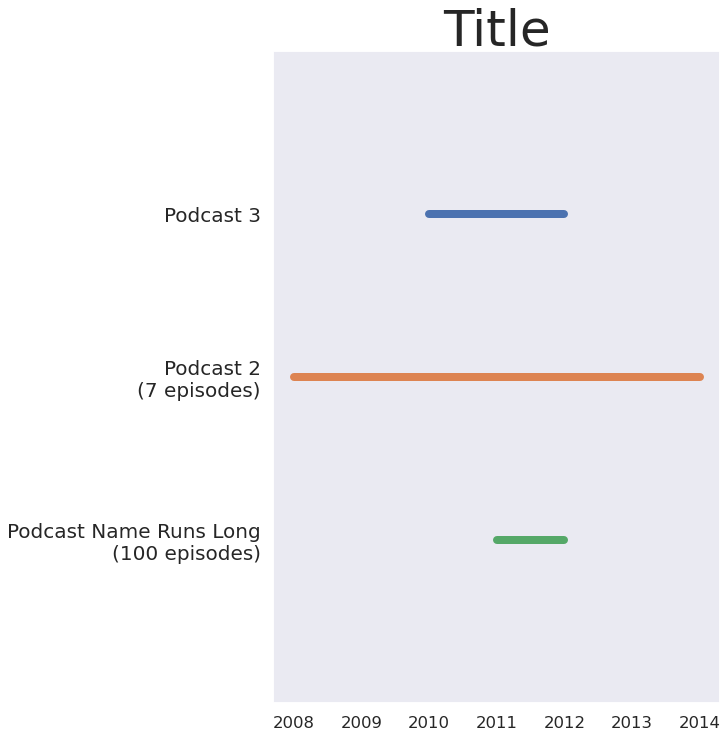

In [164]:
# plot
p = podcasts.plot.line(ylim=[0, 4], figsize = (8, 12), legend=False)
p.axes.set_title("Title",fontsize = 50)
p.set_yticks([1., 2., 3.])
p.set_yticklabels(['Podcast Name Runs Long\n(100 episodes)', 'Podcast 2\n(7 episodes)', 'Podcast 3'],fontsize=20)
p.set_xlabel('')